### Reading data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_train = np.loadtxt('preprocessed_Data_train.csv',delimiter=",")
data_test = np.loadtxt('preprocessed_Data_test.csv',delimiter=",")

In [4]:
prepared_data_train, prepared_data_test = [],[]
for i in range(0,data_train.shape[0],30):
    prepared_data_train.append(data_train[i:i+30])

for i in range(0,data_test.shape[0],30):
    prepared_data_test.append(data_test[i:i+30])

prepared_data_train = np.array(prepared_data_train)
prepared_data_test = np.array(prepared_data_test)

In [5]:
prepared_data_train.shape

(30101, 30, 4)

In [6]:
prepared_data_test.shape

(11798, 30, 4)

## Building the model

In [7]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import TimeDistributed

In [8]:
def encoder(model):
    model.add(LSTM(15, activation='relu', return_sequences=True, input_shape=(prepared_data_train.shape[1], prepared_data_train.shape[2])))
    model.add(LSTM(10, activation='relu', return_sequences=True))
    model.add(LSTM(5, activation='relu', return_sequences=True))
    return model

def decoder(model):
    model.add(LSTM(5, activation='relu', return_sequences=True))
    model.add(LSTM(10, activation='relu', return_sequences=True))
    model.add(LSTM(15, activation='relu', return_sequences=True))
    model.add(TimeDistributed(Dense(4)))
    return model

### Model execution

In [9]:
with tensorflow.device("/cpu:0"):
    model = Sequential()
    enc_model = encoder(model)
    dec_model = decoder(enc_model)
    dec_model.compile(optimizer='adam', loss='mse')
    # fit model
    dec_model.fit(prepared_data_train, prepared_data_train, epochs=10, verbose=1)

Epoch 1/10
941/941 [==============================] - 32s 29ms/step - loss: 0.1077
Epoch 2/10
941/941 [==============================] - 27s 29ms/step - loss: 0.0020
Epoch 3/10
941/941 [==============================] - 28s 29ms/step - loss: 9.2081e-04
Epoch 4/10
941/941 [==============================] - 28s 30ms/step - loss: 7.6247e-04
Epoch 5/10
941/941 [==============================] - 30s 32ms/step - loss: 6.3058e-04
Epoch 6/10
941/941 [==============================] - 30s 31ms/step - loss: 4.9568e-04
Epoch 7/10
941/941 [==============================] - 28s 30ms/step - loss: 4.2152e-04
Epoch 8/10
941/941 [==============================] - 29s 31ms/step - loss: 3.3254e-04
Epoch 9/10
941/941 [==============================] - 28s 30ms/step - loss: 2.9799e-04
Epoch 10/10
941/941 [==============================] - 30s 32ms/step - loss: 4.1011e-04


### Autoencoder evaluation

In [10]:
# demonstrate prediction
x_input = prepared_data_train[0].reshape((1, prepared_data_train.shape[1], prepared_data_train.shape[2]))
yhat = dec_model.predict(x_input, verbose=0)
print(yhat)

[[[0.87415105 0.86590874 0.2986648  0.23952366]
  [0.8536216  0.8688765  0.31528002 0.25716162]
  [0.8415682  0.842644   0.31497717 0.25370163]
  [0.8660362  0.8571003  0.3057452  0.239959  ]
  [0.8683918  0.8571219  0.3091315  0.23652041]
  [0.8710085  0.8605849  0.31024083 0.23131454]
  [0.87409633 0.863608   0.30958116 0.22626694]
  [0.87691337 0.866424   0.30920696 0.22342834]
  [0.8793819  0.86905086 0.3092069  0.22190323]
  [0.88126093 0.87117815 0.30938447 0.22104552]
  [0.882549   0.8727531  0.3096147  0.22050844]
  [0.8833484  0.87384874 0.3098332  0.2201182 ]
  [0.88378036 0.87457275 0.31001312 0.21979454]
  [0.8839518  0.87502724 0.31014854 0.21950598]
  [0.88394594 0.87529546 0.31024355 0.21924385]
  [0.8838229  0.8754397  0.31030592 0.21900964]
  [0.8836242  0.87550354 0.31034383 0.21880808]
  [0.883377   0.8755164  0.31036425 0.21864438]
  [0.8830988  0.8754973  0.3103728  0.21852277]
  [0.8828004  0.875458   0.31037337 0.21844648]
  [0.88248885 0.8754063  0.310369   0.21

In [11]:
prepared_data_train[0]

array([[0.89986348, 0.88514948, 0.30708322, 0.20280075],
       [0.89916515, 0.88518691, 0.30708322, 0.20280266],
       [0.89916277, 0.88518786, 0.30708322, 0.20280266],
       [0.89915776, 0.88518858, 0.30708322, 0.20280266],
       [0.89915705, 0.88518953, 0.30708322, 0.20280266],
       [0.89915156, 0.88518953, 0.30708322, 0.20280266],
       [0.89914918, 0.88518858, 0.30708322, 0.20280266],
       [0.8991468 , 0.88518929, 0.30708322, 0.20280266],
       [0.89913964, 0.88519073, 0.30708322, 0.20280266],
       [0.89912081, 0.88519573, 0.30708322, 0.20280266],
       [0.8991034 , 0.88519907, 0.30708322, 0.20280266],
       [0.89907455, 0.88519716, 0.30708322, 0.20280266],
       [0.89905715, 0.88519716, 0.30708322, 0.20280266],
       [0.89901543, 0.88519621, 0.30708322, 0.20280266],
       [0.89899421, 0.88519454, 0.30708322, 0.20280266],
       [0.89897847, 0.88519406, 0.30708322, 0.20280266],
       [0.89896393, 0.88519406, 0.30708322, 0.20280266],
       [0.89894962, 0.88519406,

In [12]:
yhat = dec_model.predict(prepared_data_train)

### Defining a function to calculate the error for each trajectory

In [13]:
def error_by_entry(y_real,y_pred):
    errors = []
    for real,pred in zip(y_real,y_pred):
        acc = 0
        for i,j in zip(real,pred):
            for k,l in zip(i,j):
                acc += abs(k-l)
        errors.append(acc)
    return errors

In [14]:
errors = error_by_entry(prepared_data_train,yhat)

In [15]:
errors = np.array(errors)

(0.0, 6.0)

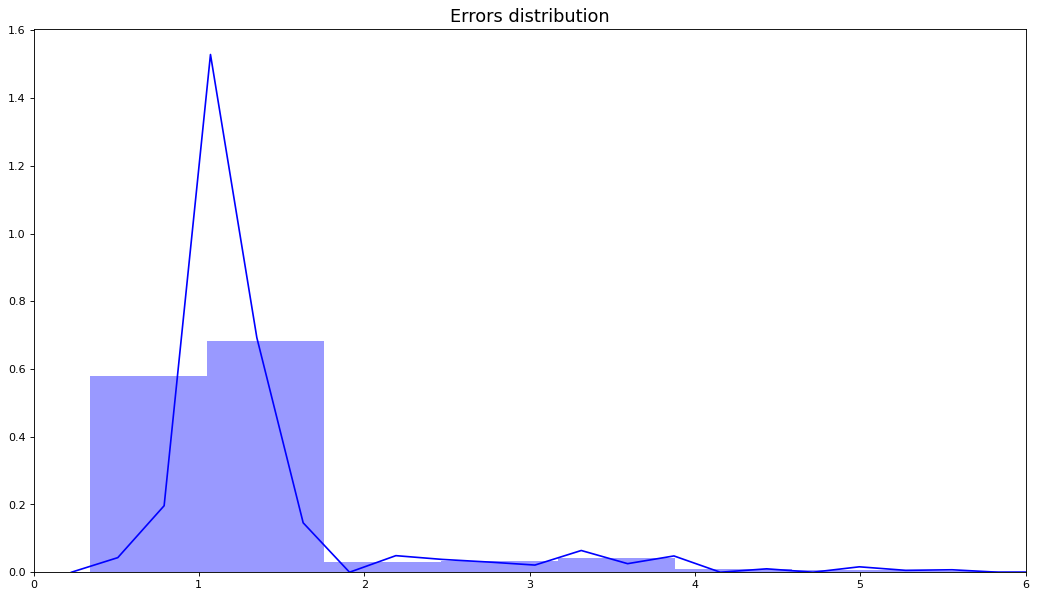

In [16]:
plt.figure(figsize=(16,9), dpi=80)
plt.title('Errors distribution', fontsize=16)
sns.distplot(errors, color='blue', bins=50)
plt.xlim([0.0, 6])

### RAMSAC

In [17]:
iterations = []
entries = [prepared_data_train]
entries_err = [errors]
max_iter = 3
models = []
for i in range(max_iter):
    treshold = entries_err[i].mean() + 2 * entries_err[i].std()
    new_entries = []
    ite = []
    for j,k in zip(entries_err[i], entries[i]):
        if (j < treshold):
            new_entries.append(k)
        else:
            ite.append(k)
    new_ent = np.array(new_entries)
    it = np.array(ite)
    iterations.append(it)
    entries.append(new_ent)
    with tensorflow.device("/cpu:0"):
        model = Sequential()
        enc_model = encoder(model)
        dec_model = decoder(enc_model)
        dec_model.compile(optimizer='adam', loss='mse')
        # fit model
        dec_model.fit(new_ent, new_ent, epochs=10, verbose=1)
        models.append(dec_model)
    new_yhat = dec_model.predict(new_ent)
    new_err = error_by_entry(new_ent,new_yhat)
    entries_err.append(np.array(new_err))
    

Epoch 1/10
919/919 [==============================] - 35s 33ms/step - loss: 1.1632
Epoch 2/10
919/919 [==============================] - 27s 30ms/step - loss: 0.0072
Epoch 3/10
919/919 [==============================] - 26s 29ms/step - loss: 0.0045
Epoch 4/10
919/919 [==============================] - 27s 29ms/step - loss: 0.0035
Epoch 5/10
919/919 [==============================] - 28s 31ms/step - loss: 0.0023
Epoch 6/10
919/919 [==============================] - 28s 31ms/step - loss: 0.0019
Epoch 7/10
919/919 [==============================] - 28s 30ms/step - loss: 0.0017
Epoch 8/10
919/919 [==============================] - 27s 29ms/step - loss: 0.0014
Epoch 9/10
919/919 [==============================] - 27s 29ms/step - loss: 0.0012
Epoch 10/10
919/919 [==============================] - 27s 30ms/step - loss: 9.3146e-04
Epoch 1/10
886/886 [==============================] - 30s 28ms/step - loss: 0.1276
Epoch 2/10
886/886 [==============================] - 28s 31ms/step - loss: 0.0034

In [18]:
print(new_ent.shape, it.shape)

(27349, 30, 4) (982, 30, 4)


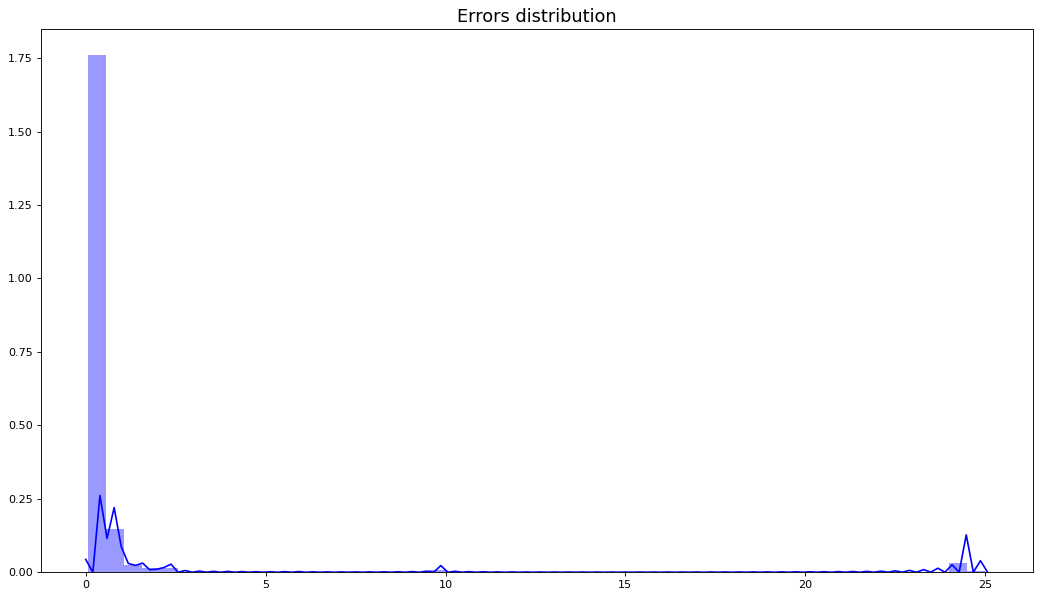

In [19]:
yhat = models[2].predict(prepared_data_test)
errors = np.array(error_by_entry(prepared_data_test,yhat))
plt.figure(figsize=(16,9), dpi=80)
plt.title('Errors distribution', fontsize=16)
sns.distplot(errors, color='blue', bins=50)
#plt.xlim([0.0, 6])

### Finding anomalies using mean and standard deviation method

In [20]:
errors.mean()

0.7552680869623551

In [21]:
thresh = errors.mean() + 2 * errors.std()

In [22]:
thresh

7.069495285665532

In [23]:
def anomalies(errors,thresh):
    ret = []
    for i in range(0,errors.shape[0]):
        if(errors[i] > thresh):
            ret.append(i)
    return(ret)

In [24]:
ret = anomalies(errors, thresh)

In [25]:
print(errors.shape,len(ret))

(11798,) 238


In [26]:
data_car = np.loadtxt('preprocessed_Data_car.csv',delimiter=",")
prepared_data_car = []
for i in range(0,data_car.shape[0],30):
    prepared_data_car.append(data_car[i:i+30])
prepared_data_car = np.array(prepared_data_car)

In [27]:
prepared_data_car.shape

(16845, 30, 4)

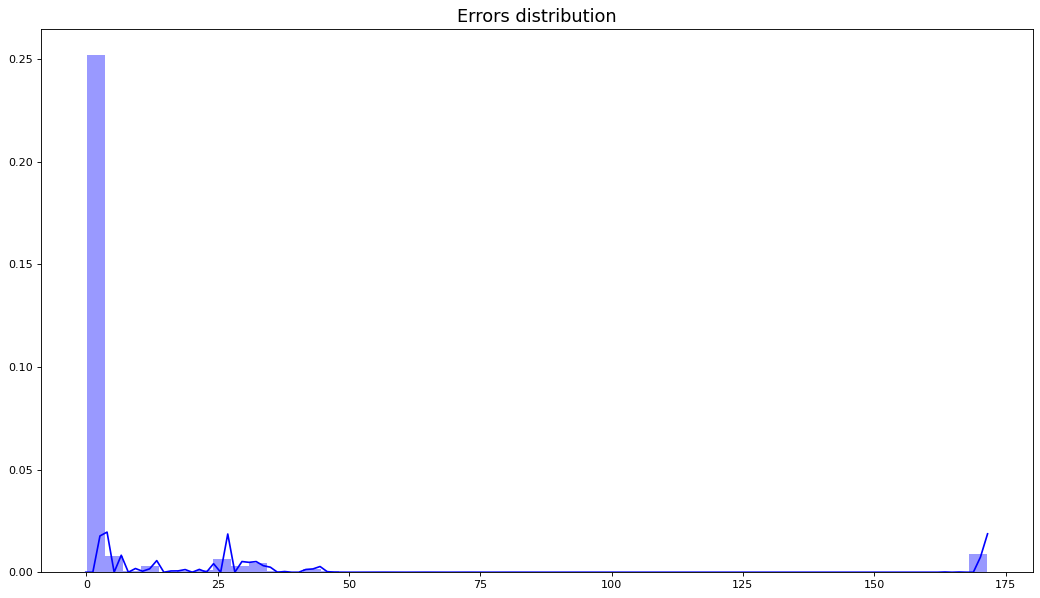

In [28]:
yhat_car = models[2].predict(prepared_data_car)
errors_car = np.array(error_by_entry(prepared_data_car,yhat_car))
plt.figure(figsize=(16,9), dpi=80)
plt.title('Errors distribution', fontsize=16)
sns.distplot(errors_car, color='blue', bins=50)

In [29]:
errors_car.mean()

7.982073726881661

In [30]:
ret = anomalies(errors_car, thresh)
print(errors_car.shape,len(ret))

(16845,) 1828


In [52]:
from sklearn.metrics import classification_report, roc_curve, auc, RocCurveDisplay

In [43]:
# pegar dados de teste, pegar os carros, escolher novo treshold
# dados de teste label 0, dados de carro label 1
# possibilidades de treshold, percorrer lista de errors
# para cada erro, escolher o erro como treshold 
# testar varios treshold e ver qual o melhor a nivel de classificação

In [49]:
y = [ (0, x) for x in errors] + [(1, x) for x in errors_car]
y_true = [ l for (l,_) in y]
labels = [0, 1]
tresholds = np.arange( min(errors), max(errors)+0.1, (max(errors)-min(errors))/100.0 )
classifications = []
rocs = []
for tresh in tresholds:
    y_pred = [ 1 if error > tresh else 0 for (_, error) in y]
    classifications.append(classification_report(y_true=y_true, y_pred=y_pred, labels=labels))
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    rocs.append( ( fpr, tpr, thresholds ,  auc(fpr, tpr) ) )

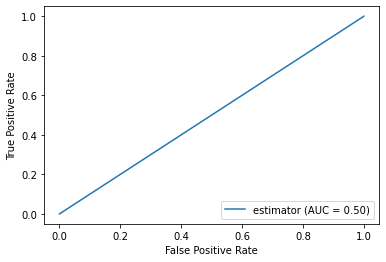

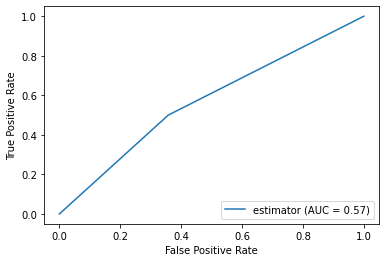

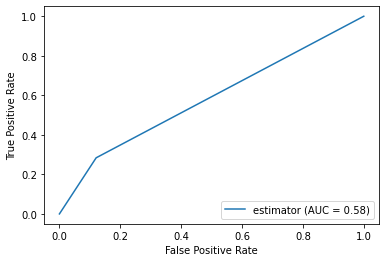

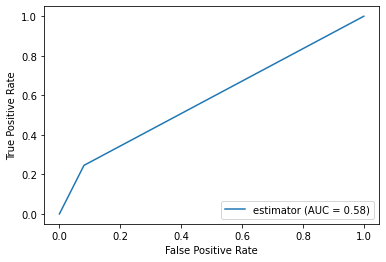

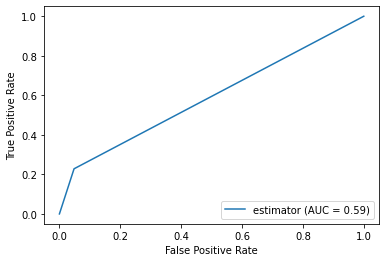

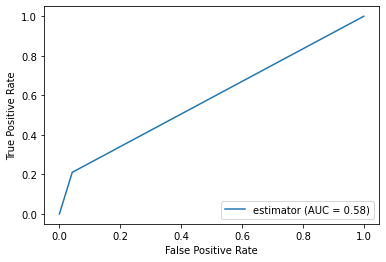

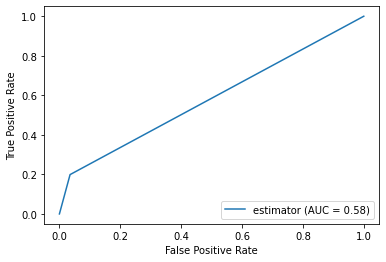

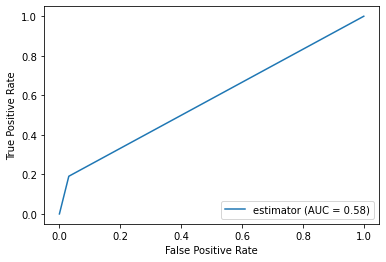

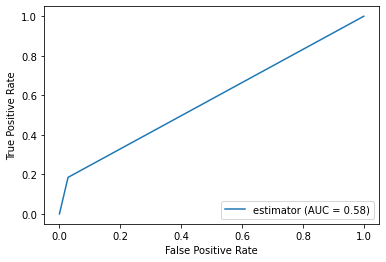

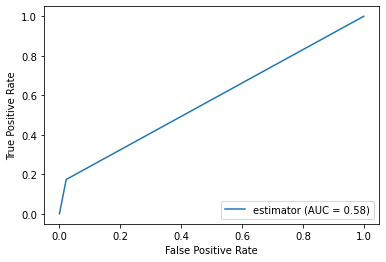

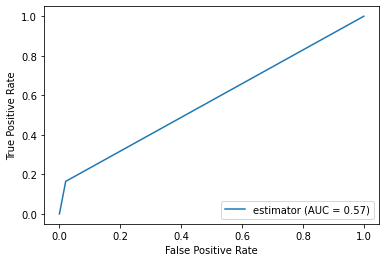

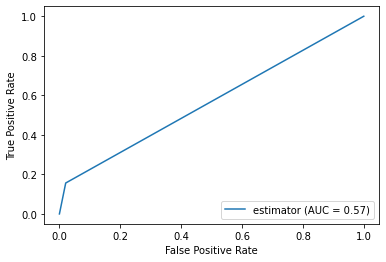

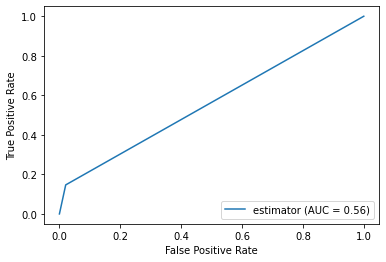

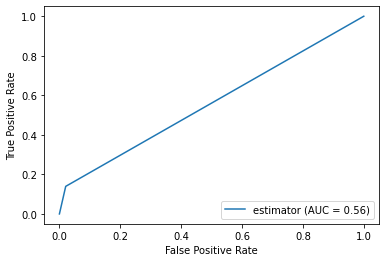

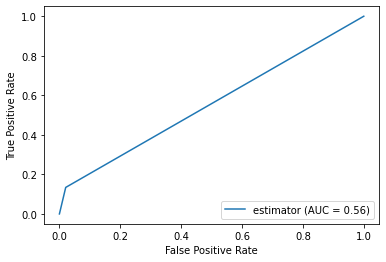

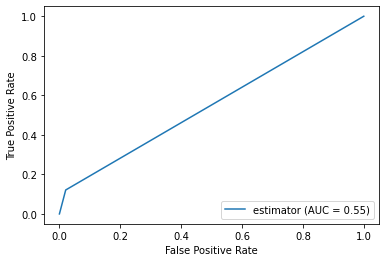

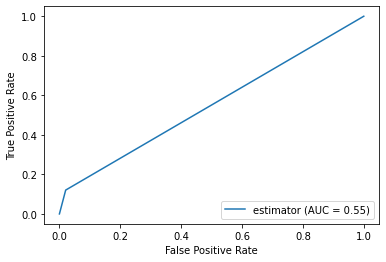

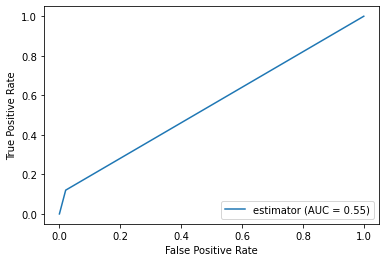

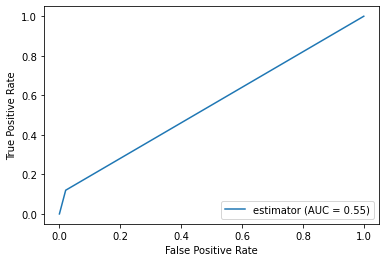

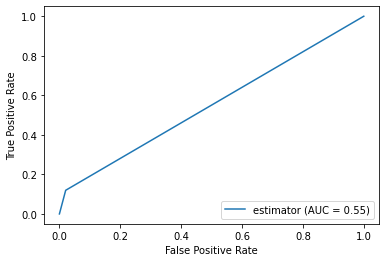

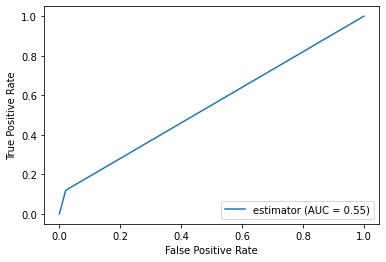

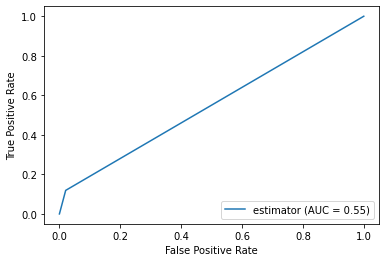

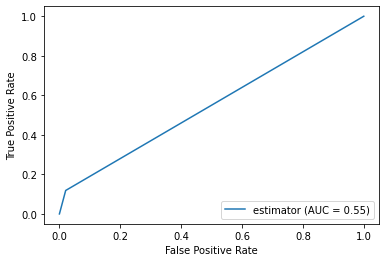

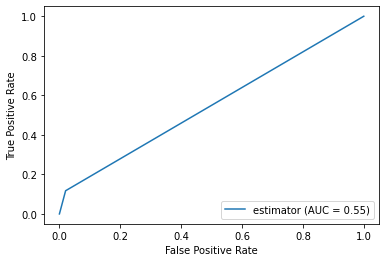

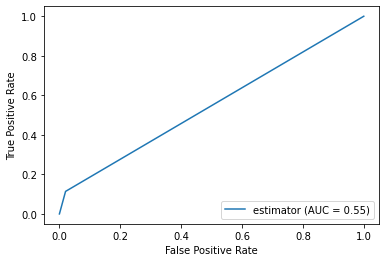

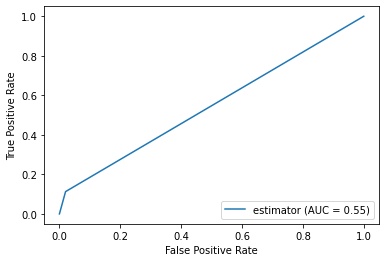

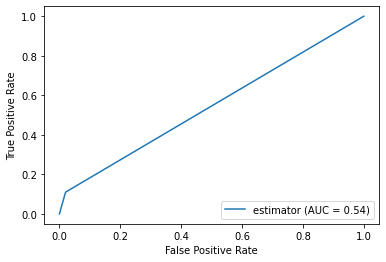

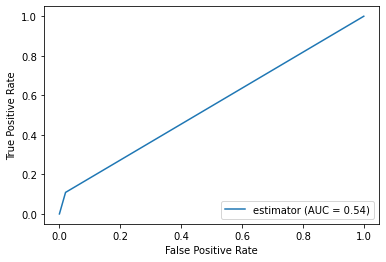

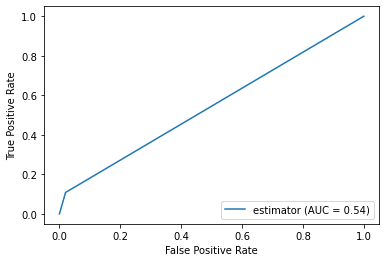

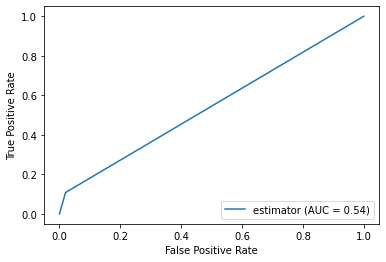

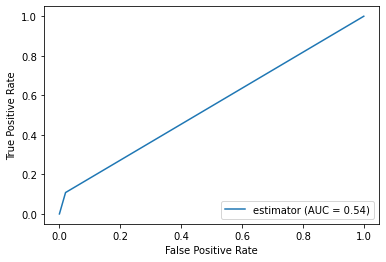

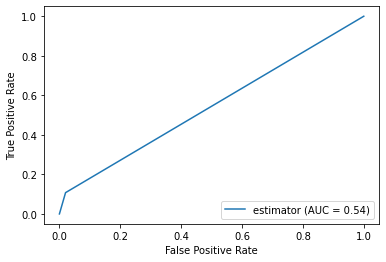

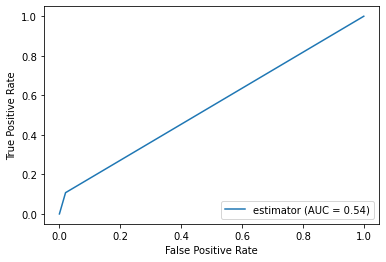

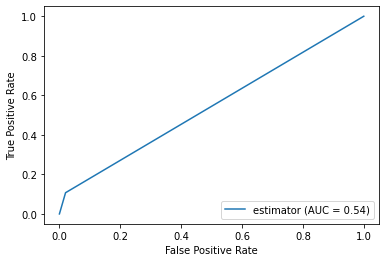

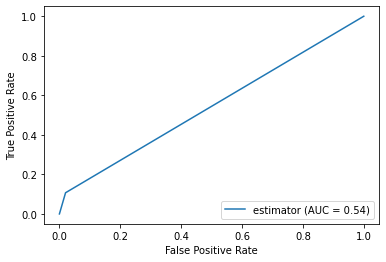

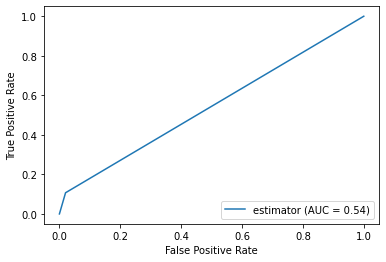

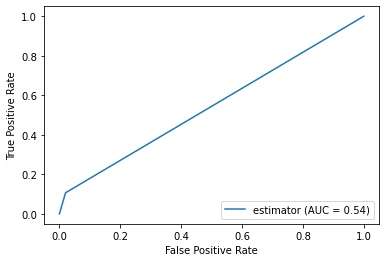

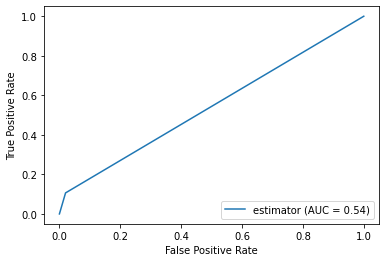

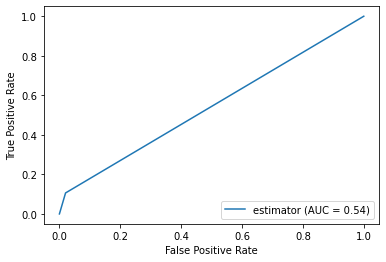

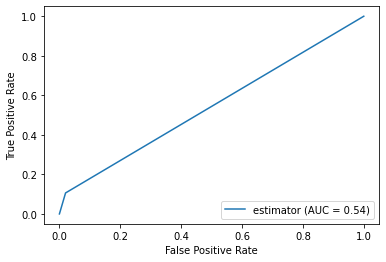

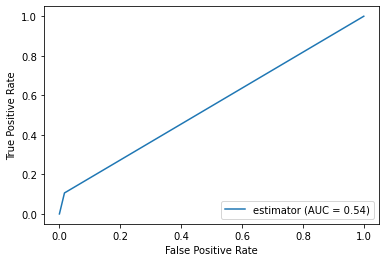

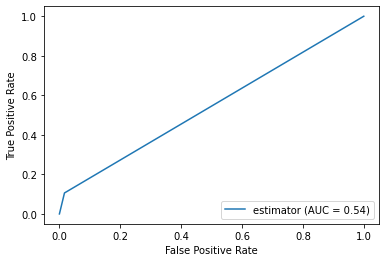

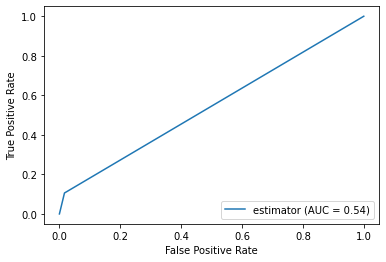

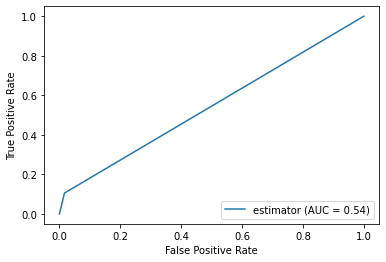

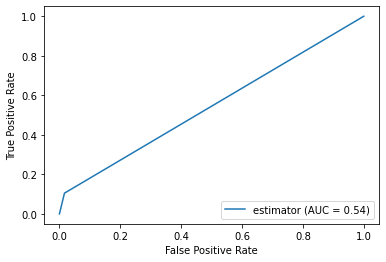

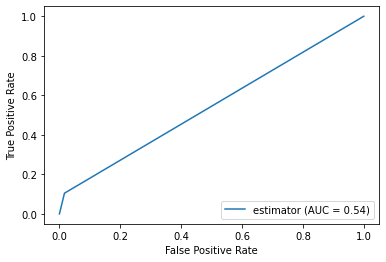

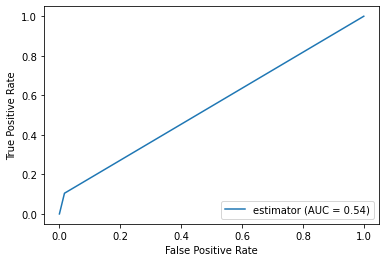

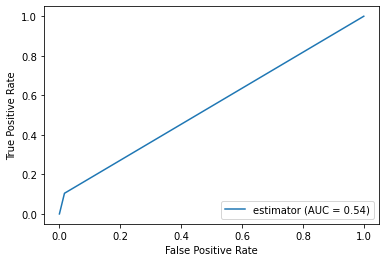

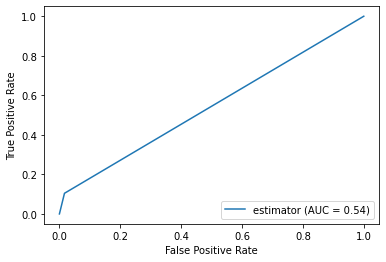

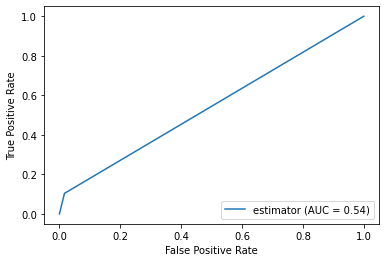

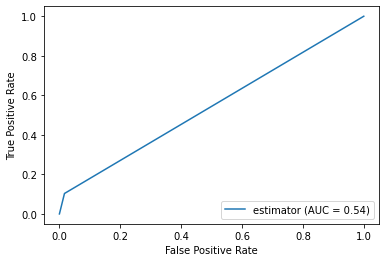

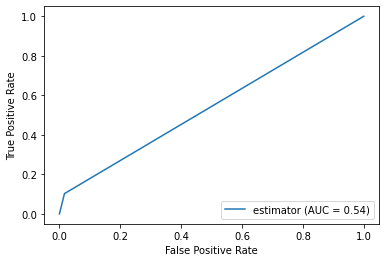

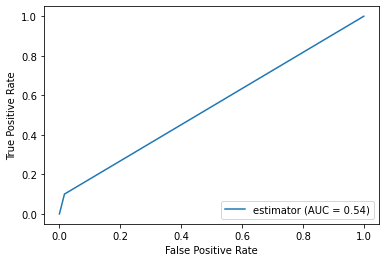

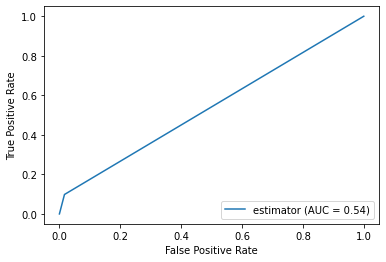

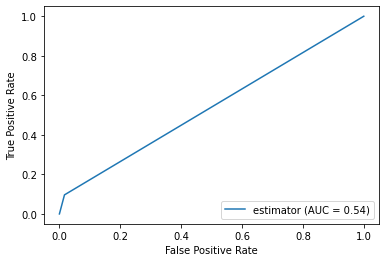

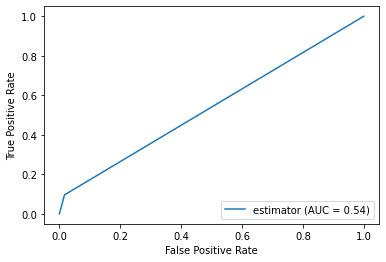

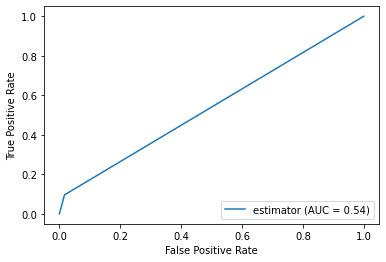

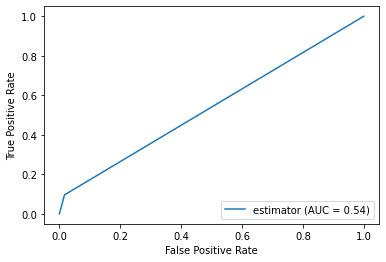

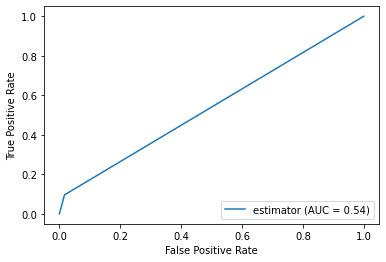

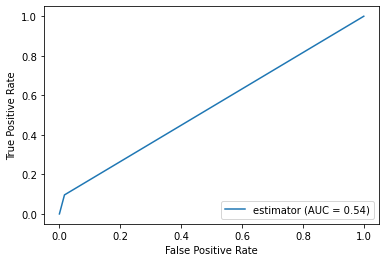

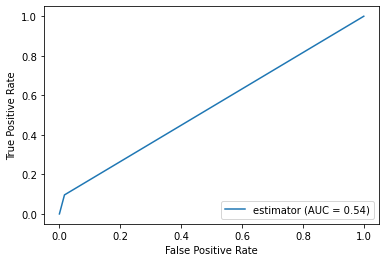

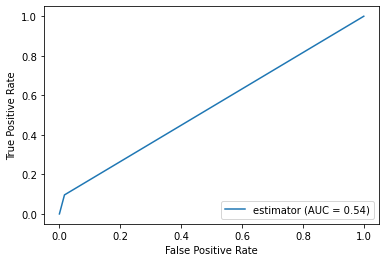

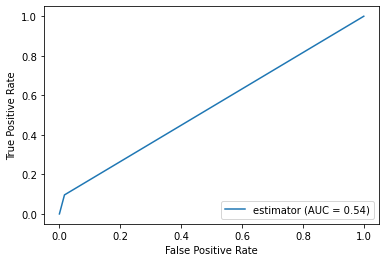

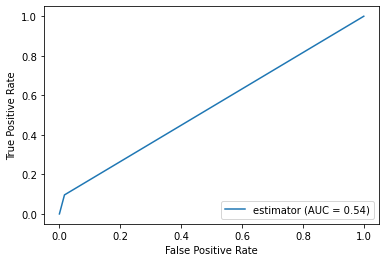

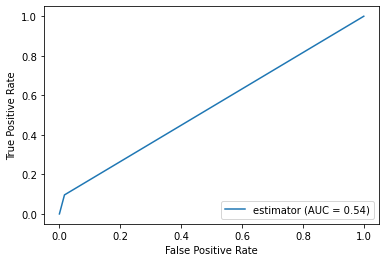

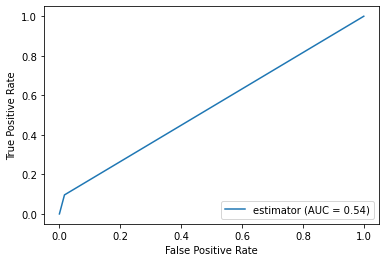

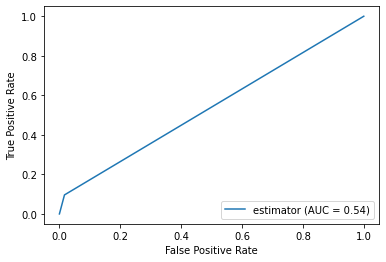

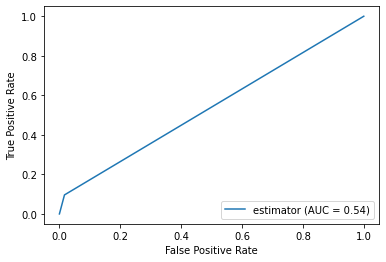

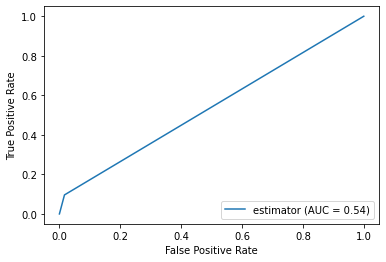

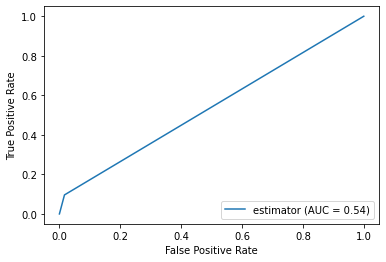

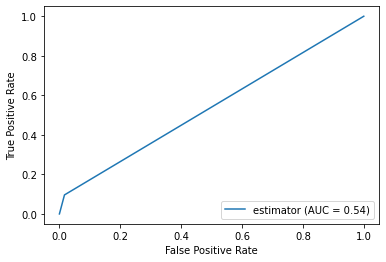

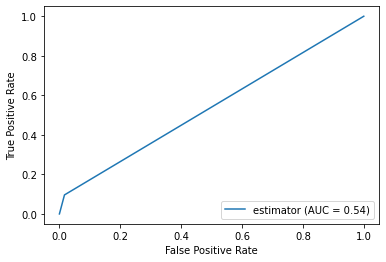

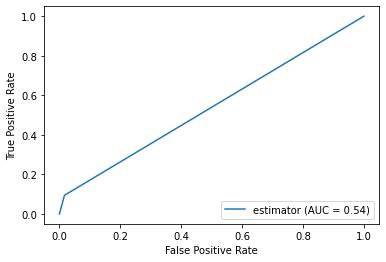

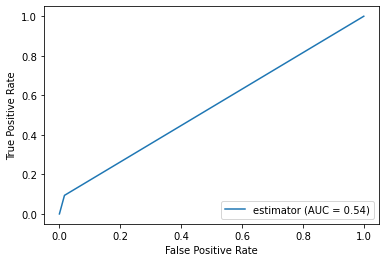

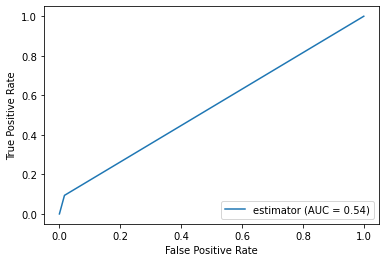

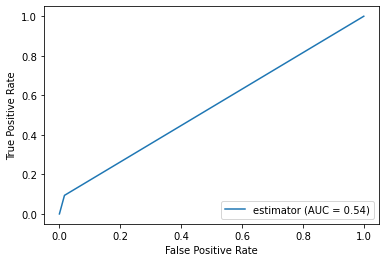

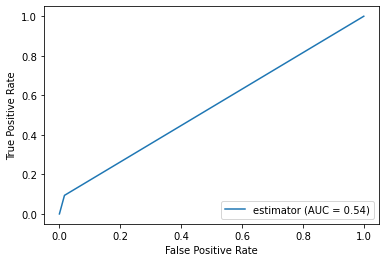

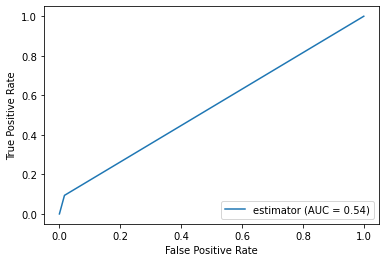

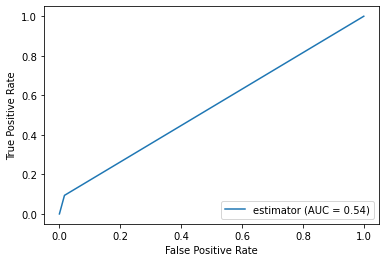

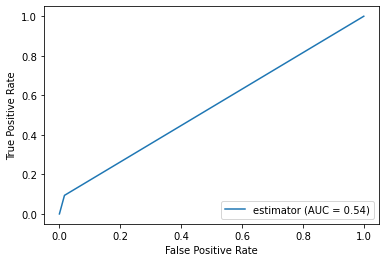

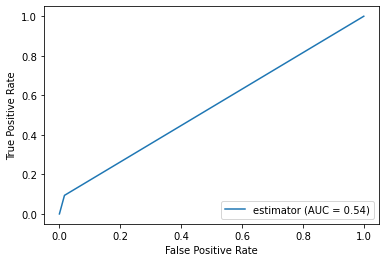

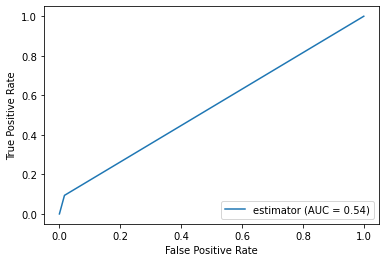

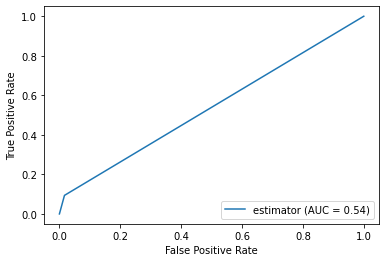

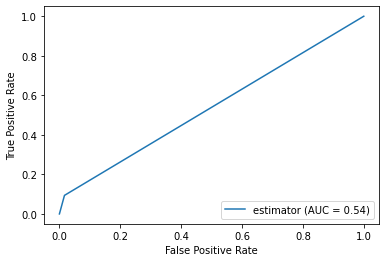

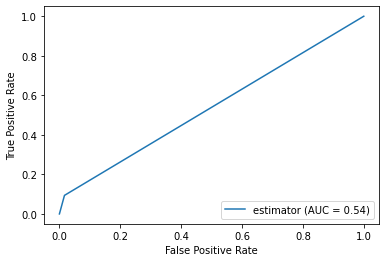

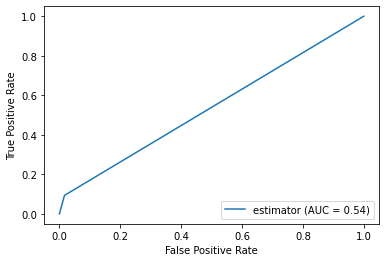

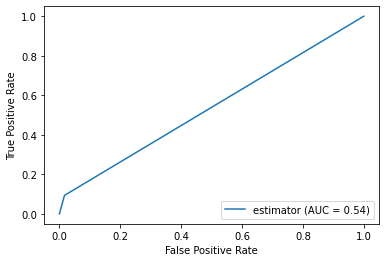

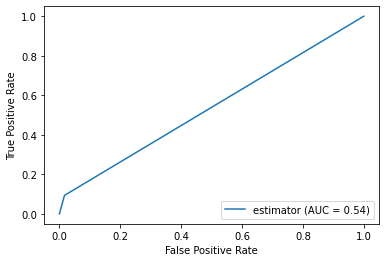

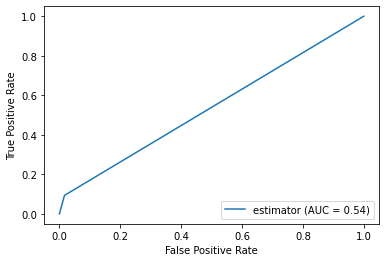

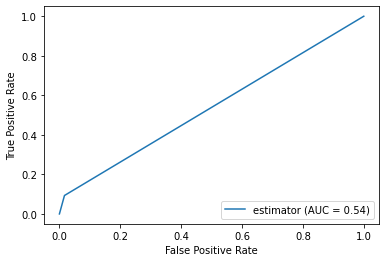

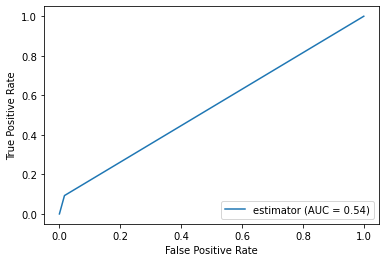

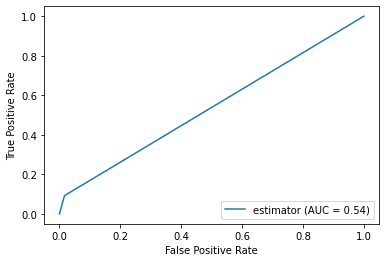

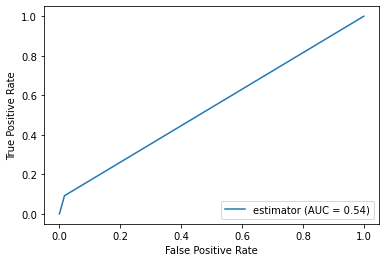

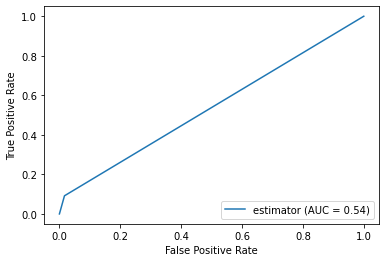

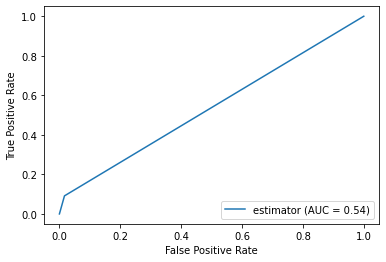

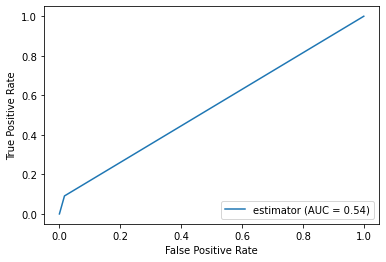

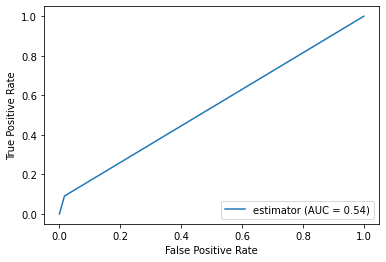

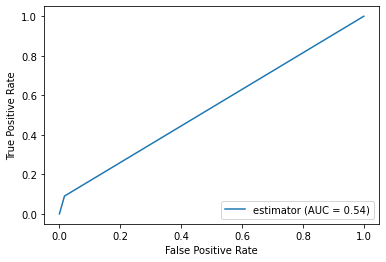

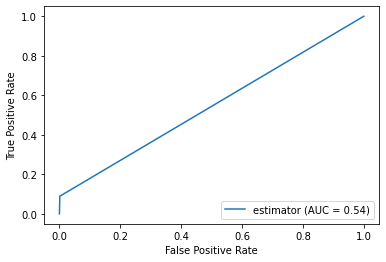

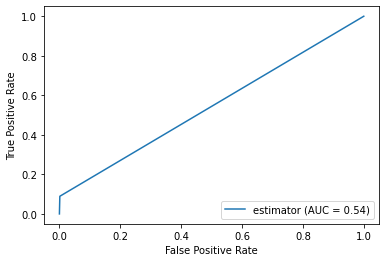

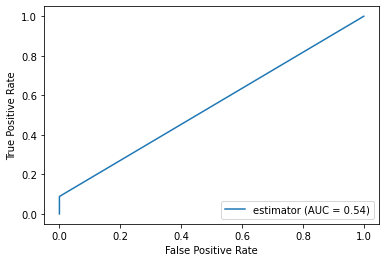

In [53]:
for (fpr, tpr, thresholds, roc_auc) in rocs:
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='estimator')
    display.plot()
    plt.show()